In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Features_ManualRS.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [59]:
df.sample(5)

,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
4407,1302,2,RP,Manual,ngtdm_Complexity,0.173921
8848,1601,5,RP,Manual,firstorder_Uniformity,0.706749
3958,1553,3,RP,Manual,glszm_HighGrayLevelZoneEmphasis,0.450168
2966,1088,4,MS,Manual,firstorder_Skewness,0.000000
2221,829,2,RP,Manual,firstorder_Energy,0.188360


In [60]:
# get selected features
selected_features = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/HM-FS-Final-RS/Features/Features_Selected.csv')
selected_features = selected_features.drop(['Unnamed: 0'], axis=1)
selected_features = selected_features['Feature'].tolist()

# get selected features
# df = df.loc[df['Feature'].isin(selected_features)]
df.sample(5)

,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
6027,653,3,RP,Manual,glcm_Idn,0.688786
2409,829,3,RP,Manual,gldm_SmallDependenceLowGrayLevelEmphasis,0.433225
7149,752,4,MS,Manual,shape_MinorAxisLength,0.416946
3138,1088,5,MS,Manual,gldm_LargeDependenceEmphasis,0.757894
6513,1029,3,RP,Manual,shape_MajorAxisLength,0.521484


In [61]:
df['Group'] = df['Feature'].apply(lambda x: x.split('_')[0])
df.sample(5)

,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,Group
9174,1481,3,RP,Manual,glcm_Id,0.636114,glcm
4617,1302,4,RP,Manual,ngtdm_Complexity,0.103283,ngtdm
6128,653,4,RP,Manual,glcm_DifferenceVariance,0.134676,glcm
905,713,4,RP,Manual,glrlm_RunPercentage,0.280321,glrlm
1101,1483,1,MS,Manual,glcm_SumAverage,0.000000,glcm


In [62]:
grps = df['Group'].unique()
grps

array(['shape', 'firstorder', 'glcm', 'glrlm', 'glszm', 'gldm', 'ngtdm'],
      dtype=object)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


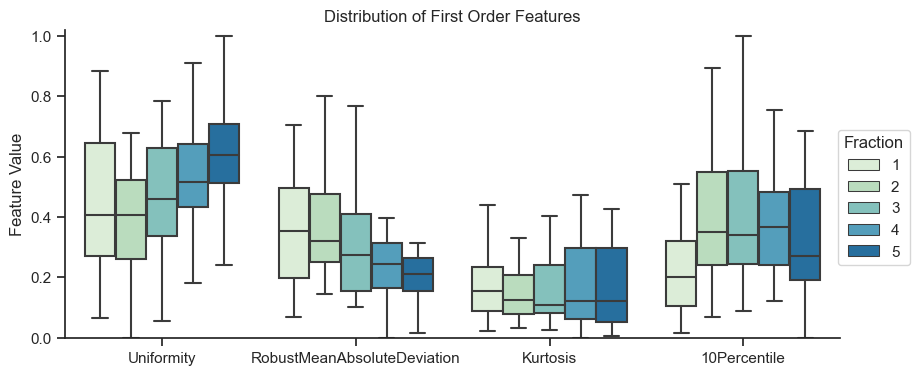

In [115]:
# get 4 first order features
first_order = df.loc[df['Group'] == 'firstorder']
first_order['Feature'] = first_order['Feature'].apply(lambda x: x.split('_')[1])
#rand_fts = np.random.choice(first_order['Feature'].unique(), 4, replace=False)

rand_fts = ['10Percentile', 'Uniformity', 'RobustMeanAbsoluteDeviation', 'Kurtosis']
first_order = first_order.loc[first_order['Feature'].isin(rand_fts)]
first_order.sort_values(by=['Feature'], inplace=True, ascending=False)

# boxplot
fig, ax = plt.subplots(figsize=(10, 4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.boxplot(x='Feature', y='FeatureValue', hue='Fraction', palette='GnBu',data=first_order, ax=ax, showfliers=False)
ax.set_xlabel('')
ax.set_ylabel('Feature Value')
ax.set_ylim(0, 1.02)
ax.set_title('Distribution of First Order Features')
ax.legend(loc='upper right', title='Fraction', bbox_to_anchor=(1.1, 0.7))
sns.set_theme(style="ticks", rc=custom_params)
plt.savefig('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Visualisation/Plots/BoxPlotFirstOrder.png', dpi=300, bbox_inches='tight')



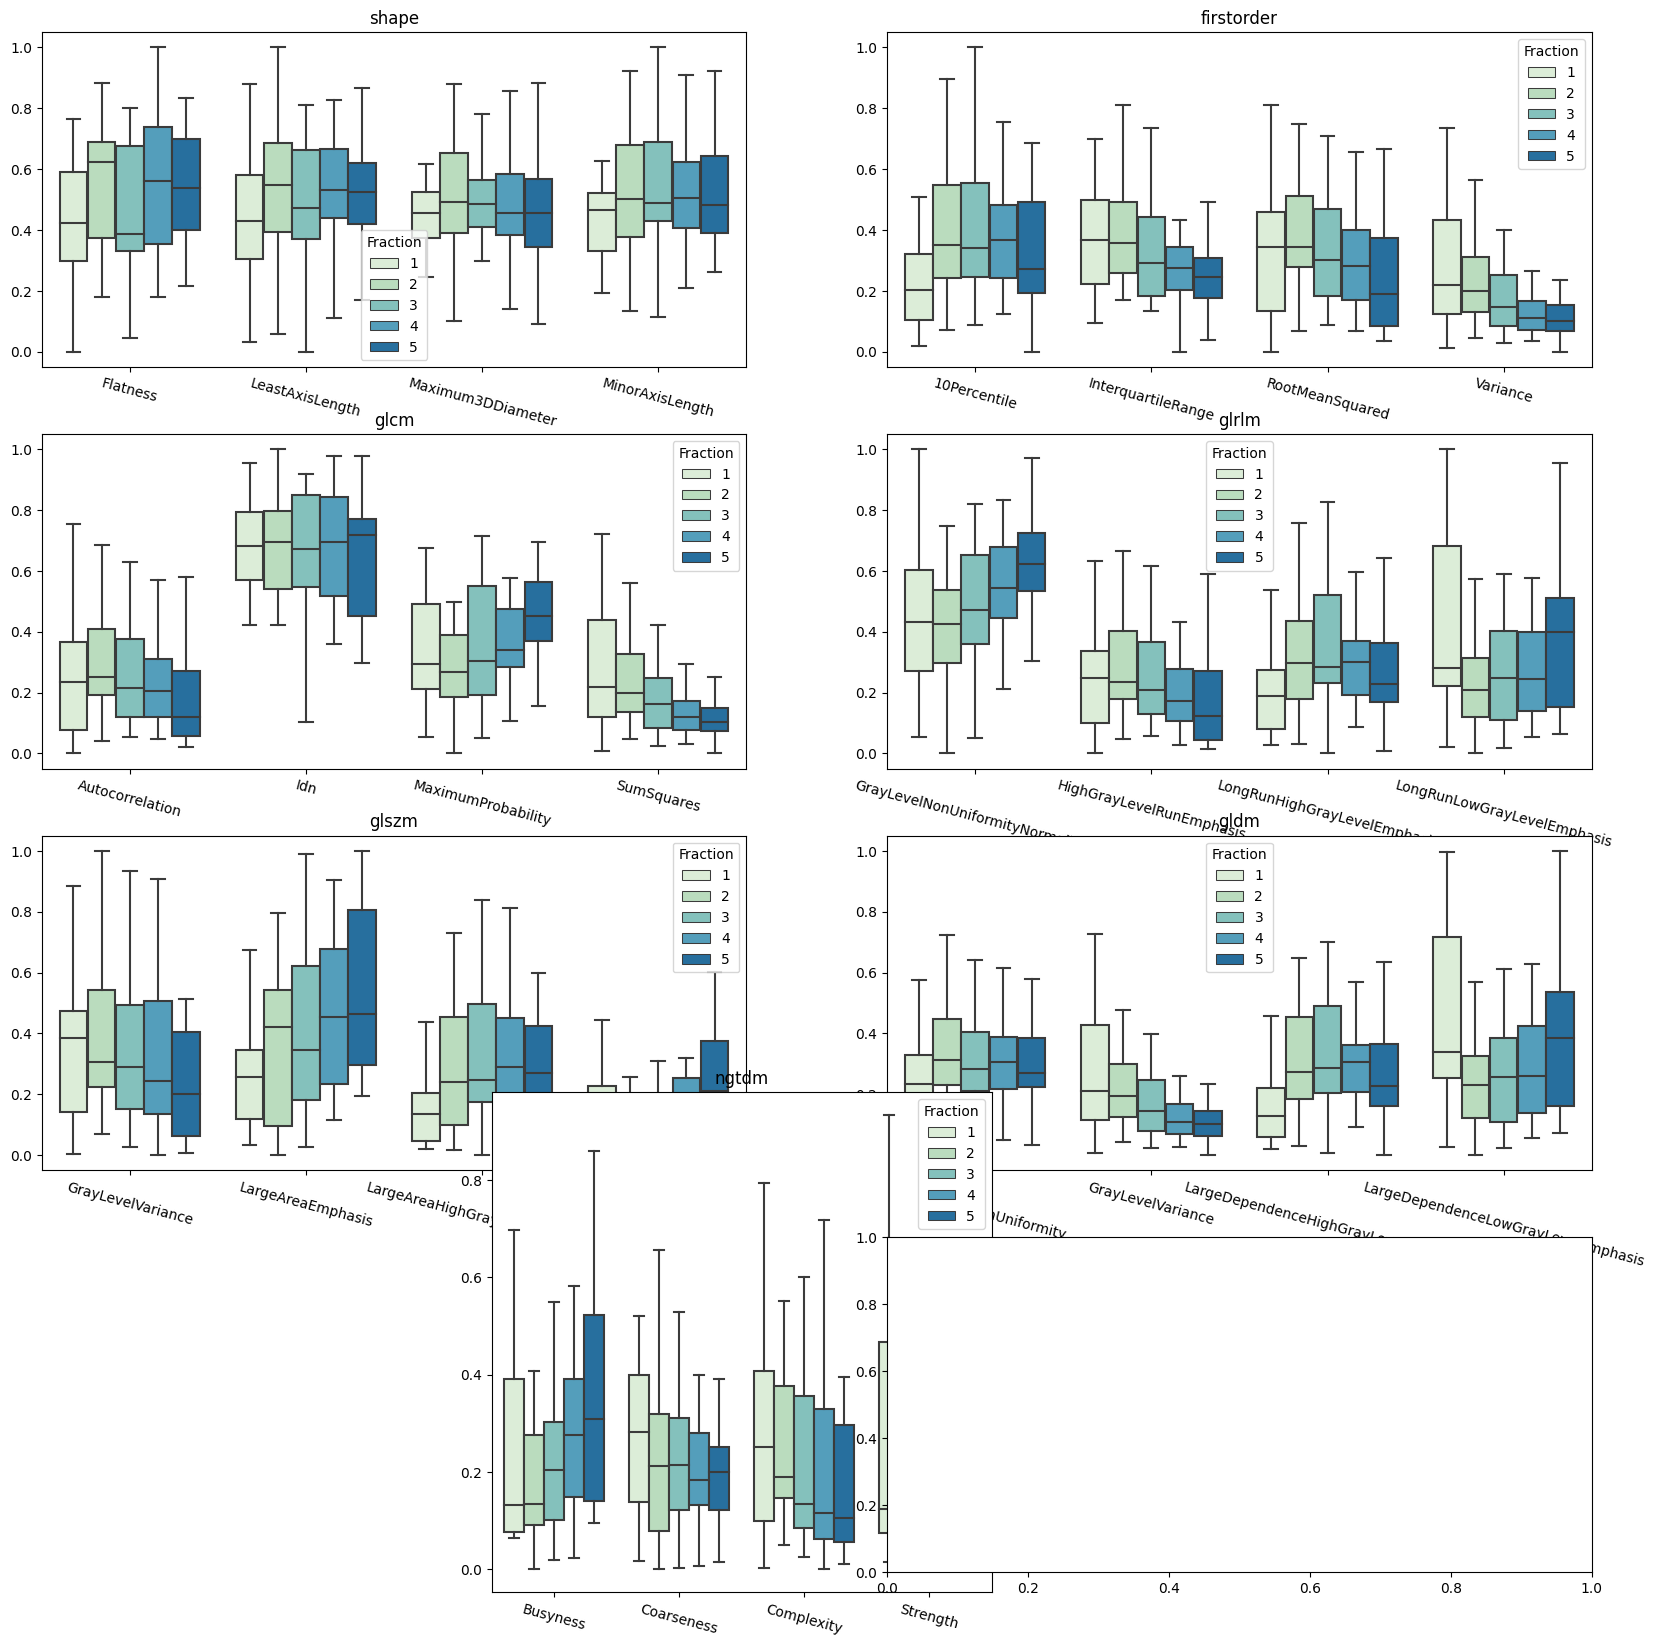

In [83]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
axs = axs.ravel()

for i, grp in enumerate(grps):
    # if i = 7 move in to center
    if i == 6:
        axs[i].set_position([0.35, 0.1, 0.25, 0.25])
    elif i == 7:
        # make invisible
        axs[i].

    df_grp = df.loc[df['Group'] == grp]
    fts = df_grp['Feature'].unique()
    fts_plot = np.random.choice(fts, 4, replace=False)
    df_grp = df_grp.loc[df_grp['Feature'].isin(fts_plot)]
    df_grp['Feature'] = df_grp['Feature'].apply(lambda x: x.split('_')[1])
    sns.boxplot(x='Feature', y='FeatureValue', hue='Fraction', data=df_grp, ax=axs[i], showfliers=False, palette='GnBu')
    axs[i].set_title(grp)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=-15)

# for i, grp in enumerate(grps):
#     df_grp = df.loc[df['Group'] == grp]
#     fts = df_grp['Feature'].unique()
#     fts_plot = np.random.choice(fts, 4, replace=False)
#     df_grp = df_grp.loc[df_grp['Feature'].isin(fts_plot)]
#     sns.boxplot(x='Feature', y='FeatureValue', hue='Fraction', data=df_grp, ax=axs[i])
#     axs[i].set_title(grp)
#     axs[i].set_xlabel('')
#     axs[i].set_ylabel('')
#     axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

Text(0.5, 1.02, 'Selected Features')

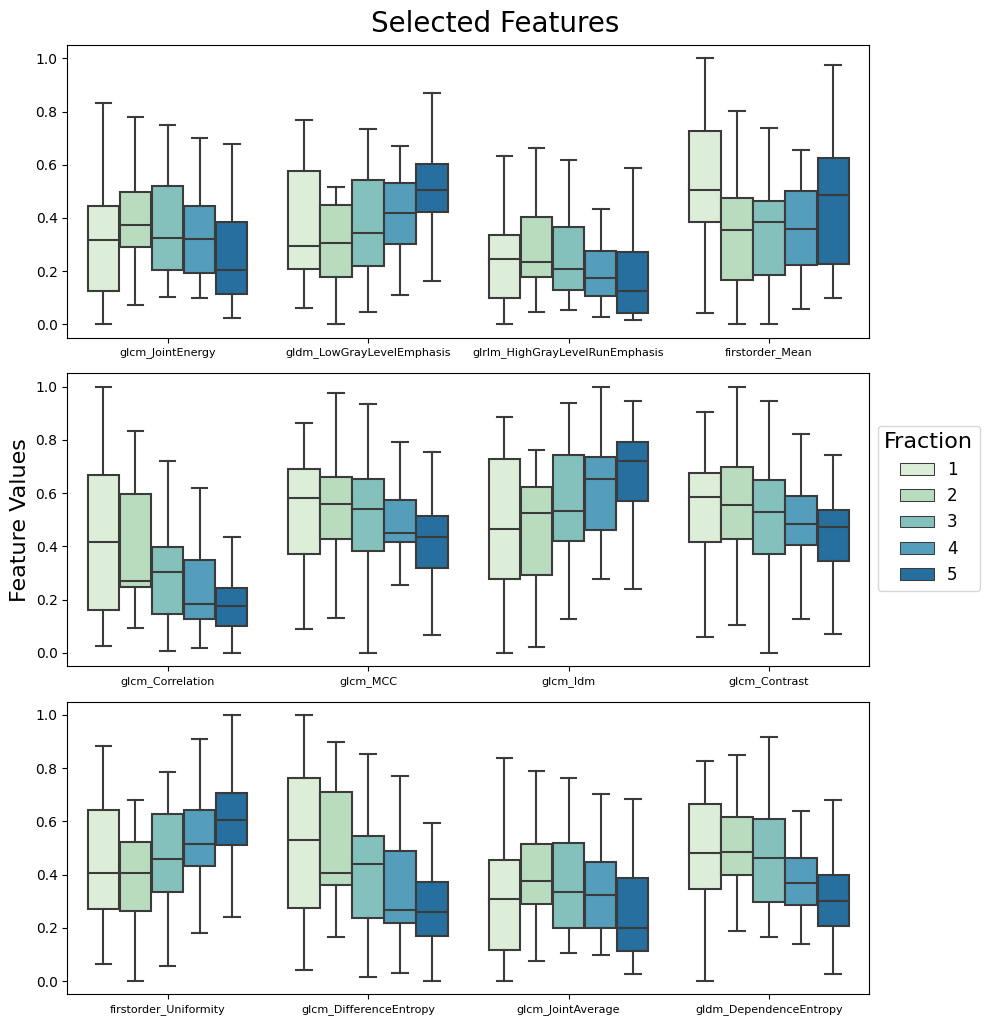

In [63]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
# split features in to 3 sets
for i in range(3):
    fts_plot = selected_features[i*4:(i+1)*4]
    df_plot = df.loc[df['Feature'].isin(fts_plot)]
    sns.boxplot(x='Feature', y='FeatureValue', hue='Fraction', data=df_plot, ax=ax[i], showfliers=False, palette='GnBu')
    ax[i].set_xticklabels(fts_plot, rotation=0, fontsize=8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    
    if i == 1:
        ax[i].legend(loc='upper left', bbox_to_anchor=(1, 0.85), fontsize=12, title='Fraction', title_fontsize=16)
        ax[i].set_ylabel('Feature Values', fontsize=16)
    else:
        ax[i].legend().remove()

plt.tight_layout()
plt.suptitle('Selected Features', fontsize=20, y=1.02)